## Predicting Earnings from Census Data

The United States government periodically collects demographic information by conducting a census.

In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Adult) .

The file census.csv contains 1994 census data for 31,978 individuals in the United States.

The dataset includes the following 13 variables:

- age = the age of the individual in years
- workclass = the classification of the individual's working status (does the person work for the federal government, work for the local government, work without pay, and so on)
- education = the level of education of the individual (e.g., 5th-6th grade, high school graduate, PhD, so on)
- maritalstatus = the marital status of the individual
- occupation = the type of work the individual does (e.g., administrative/clerical work, farming/fishing, sales and so on)
- relationship = relationship of individual to his/her household
- race = the individual's race
- sex = the individual's sex
- capitalgain = the capital gains of the individual in 1994 (from selling an asset such as a stock or bond for more than the original purchase price)
- capitalloss = the capital losses of the individual in 1994 (from selling an asset such as a stock or bond for less than the original purchase price)
- hoursperweek = the number of hours the individual works per week
- nativecountry = the native country of the individual
- over50k = whether or not the individual earned more than $50,000 in 1994

### A Logistic Regression Model

Let's begin by building a logistic regression model to predict whether an individual's earnings are above $50,000 (the variable "over50k") using all of the other variables as independent variables. First, read the dataset census.csv into R.

Then, split the data randomly into a training set and a testing set, setting the seed to 2000 before creating the split. Split the data so that the training set contains 60% of the observations, while the testing set contains 40% of the observations.

Next, build a logistic regression model to predict the dependent variable "over50k", using all of the other variables in the dataset as independent variables. Use the training set to build the model.

In [2]:
census = read.csv('./dataset/census.csv')

In [3]:
library('caTools')
set.seed(2000)

In [4]:
split = sample.split(census$over50k, SplitRatio=0.6)
train = subset(census, split == TRUE)
test = subset(census, split == FALSE)

In [5]:
Logcensus = glm(over50k ~ ., data=train, family='binomial')
summary(Logcensus)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = over50k ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                      

In [6]:
LogCensusPred = predict(Logcensus, newdata=test, type='response')
table(test$over50k, LogCensusPred > 0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        
         FALSE TRUE
   <=50K  9051  662
   >50K   1190 1888

In [7]:
accuracy = (9051 + 1888) / nrow(test)
accuracy

[1] 0.8552107

In [8]:
table(train$over50k)
baseline = rep("<=50K", nrow(test))
table(test$over50k, baseline)[1] / nrow(test)


 <=50K   >50K 
 14570   4617 

[1] 0.7593621

In [9]:
table(test$over50k)


 <=50K   >50K 
  9713   3078 

In [10]:
library("ROCR")

In [11]:
pred = prediction(LogCensusPred, test$over50k)
as.numeric(performance(pred, "auc")@y.values)

[1] 0.9061598

### A CART Model

We have just seen how the logistic regression model for this data achieves a high accuracy. Moreover, the significances of the variables give us a way to gauge which variables are relevant for this prediction task. However, it is not immediately clear which variables are more important than the others, especially due to the large number of factor variables in this problem.

Let us now build a classification tree to predict "over50k". Use the training set to build the model, and all of the other variables as independent variables. Use the default parameters, so don't set a value for minbucket or cp. Remember to specify method="class" as an argument to rpart, since this is a classification problem. After you are done building the model, plot the resulting tree.

In [12]:
library("rpart")
library("rpart.plot")

In [13]:
CARTover = rpart(over50k ~ ., data=train, method='class')
summary(CARTover)

Call:
rpart(formula = over50k ~ ., data = train, method = "class")
  n= 19187 

          CP nsplit rel error    xerror       xstd
1 0.12183236      0 1.0000000 1.0000000 0.01282467
2 0.06562703      2 0.7563353 0.7660819 0.01163352
3 0.03747022      3 0.6907083 0.7132337 0.01131225
4 0.01000000      4 0.6532380 0.6562703 0.01094053

Variable importance
 relationship maritalstatus   capitalgain     education           sex 
           27            26            12            10             8 
   occupation           age  hoursperweek 
            7             6             3 

Node number 1: 19187 observations,    complexity param=0.1218324
  predicted class= <=50K  expected loss=0.2406317  P(node) =1
    class counts: 14570  4617
   probabilities: 0.759 0.241 
  left son=2 (10478 obs) right son=3 (8709 obs)
  Primary splits:
      relationship  splits as  RLLLLR, improve=1391.9300, (0 missing)
      maritalstatus splits as  LRRLLLL, improve=1375.6510, (0 missing)
      capitalgain   

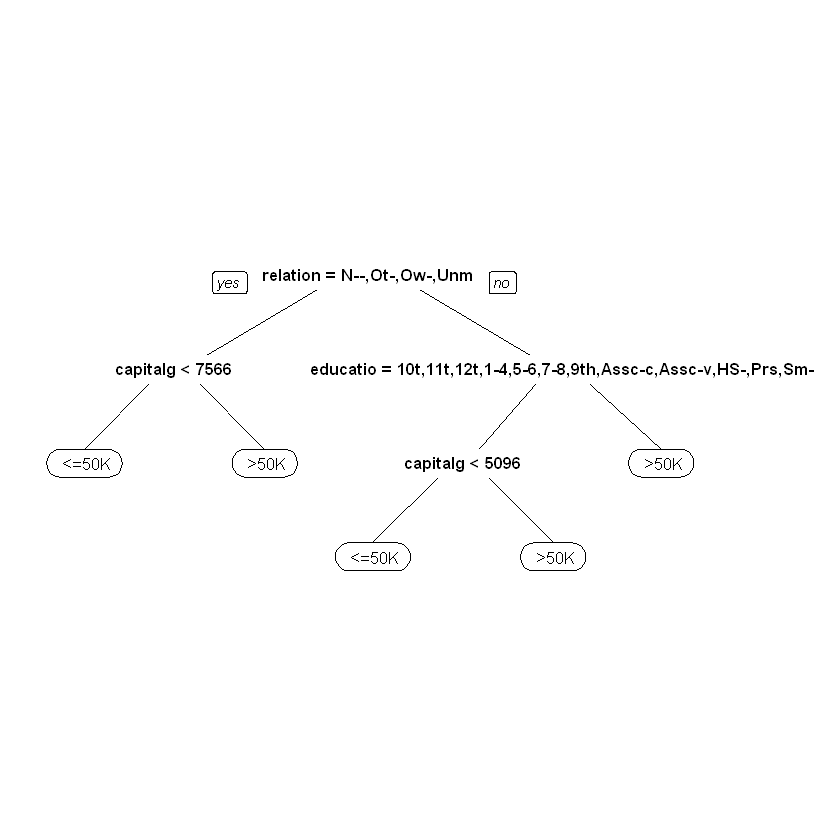

In [14]:
prp(CARTover)

In [15]:
CARTpred = predict(CARTover, newdata=test, type='class')

In [16]:
table(test$over50k, CARTpred)

        CARTpred
          <=50K  >50K
   <=50K   9243   470
   >50K    1482  1596

In [17]:
accuracy = (9243 + 1596) / nrow(test)
accuracy

[1] 0.8473927

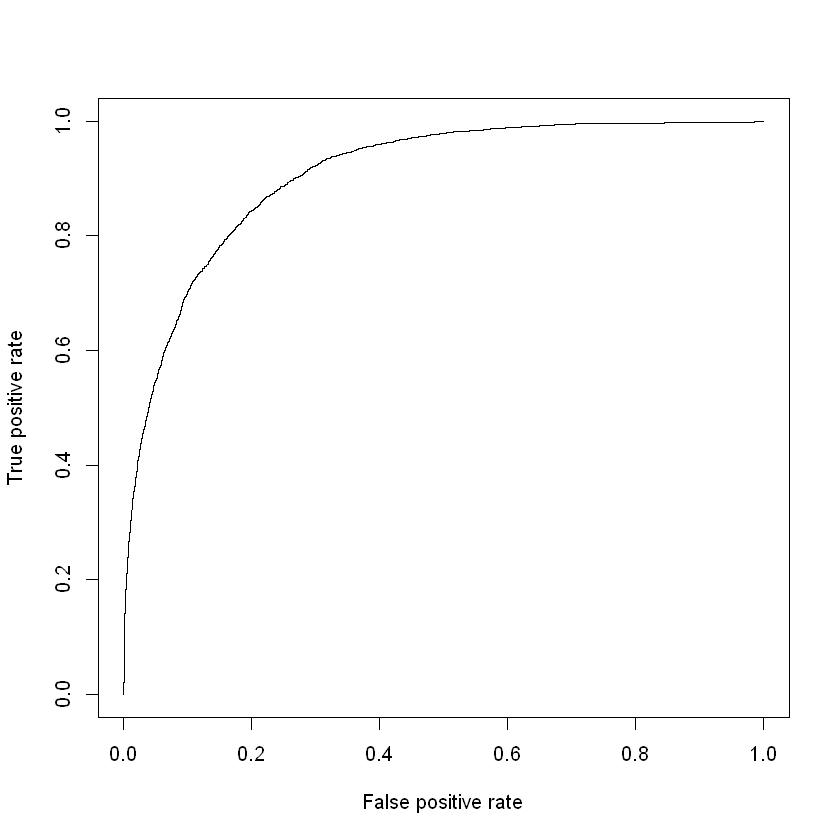

In [20]:
ROCRpred = prediction(LogCensusPred, test$over50k)
ROCRperf = performance(ROCRpred, "tpr", "fpr")
plot(ROCRperf)

In [25]:
CARTpred = predict(CARTover, newdata=test)

In [26]:
ROCRpred = prediction(CARTpred[, 2], test$over50k)

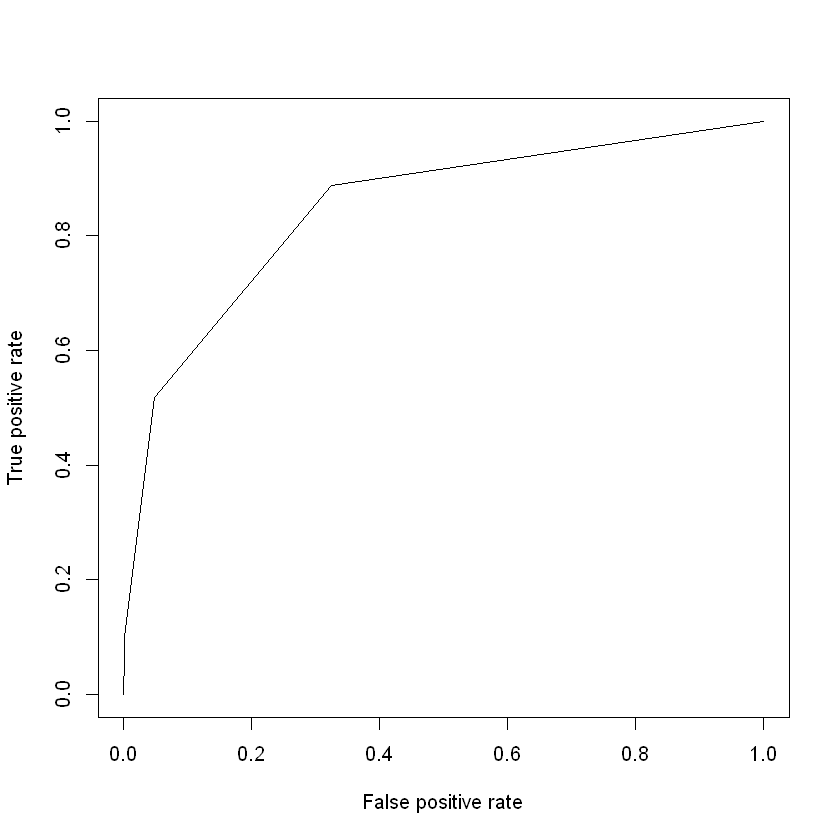

In [27]:
ROCRperf = performance(ROCRpred, "tpr", "fpr")
plot(ROCRperf)

In [28]:
auc = as.numeric(performance(ROCRpred, "auc")@y.values)
auc

[1] 0.8470256

### A Random Forest Model

Before building a random forest model, we'll down-sample our training set. While some modern personal computers can build a random forest model on the entire training set, others might run out of memory when trying to train the model since random forests is much more computationally intensive than CART or Logistic Regression. For this reason, before continuing we will define a new training set to be used when building our random forest model, that contains 2000 randomly selected obervations from the original training set. Do this by running the following commands in your R console (assuming your training set is called "train"):
```R
set.seed(1)

trainSmall = train[sample(nrow(train), 2000), ]
```
Let us now build a random forest model to predict "over50k", using the dataset "trainSmall" as the data used to build the model. Set the seed to 1 again right before building the model, and use all of the other variables in the dataset as independent variables. (If you get an error that random forest "can not handle categorical predictors with more than 32 categories", re-build the model without the nativecountry variable as one of the independent variables.)

In [29]:
set.seed(1)
trainSmall = train[sample(nrow(train), 2000), ]

In [30]:
library("randomForest")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [31]:
set.seed(1)
overForest = randomForest(over50k ~ ., data=trainSmall)
summary(overForest)

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted       2000   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes           4000   matrix numeric  
oob.times       2000   -none- numeric  
classes            2   -none- character
importance        12   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               2000   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

Then, make predictions using this model on the entire test set. What is the accuracy of the model on the test set, using a threshold of 0.5? (Remember that you don't need a "type" argument when making predictions with a random forest model if you want to use a threshold of 0.5. Also, note that your accuracy might be different from the one reported here, since random forest models can still differ depending on your operating system, even when the random seed is set. We have set an accordingly high tolerance in this answer field.)

In [32]:
overForestpred = predict(overForest, newdata=test)
table(overForestpred, test$over50k)

              
overForestpred  <=50K  >50K
         <=50K   8955  1125
         >50K     758  1953

In [33]:
accuracy = (8955 + 1953) / nrow(test)
accuracy

[1] 0.8527871

As we discussed in lecture, random forest models work by building a large collection of trees. As a result, we lose some of the interpretability that comes with CART in terms of seeing how predictions are made and which variables are important. However, we can still compute metrics that give us insight into which variables are important.

One metric that we can look at is the number of times, aggregated over all of the trees in the random forest model, that a certain variable is selected for a split. To view this metric, run the following lines of R code (replace "MODEL" with the name of your random forest model):
```R
vu = varUsed(MODEL, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted$x, names(MODEL$forest$xlevels[vusorted$ix]))
```
This code produces a chart that for each variable measures the number of times that variable was selected for splitting (the value on the x-axis). Which of the following variables is the most important in terms of the number of splits?

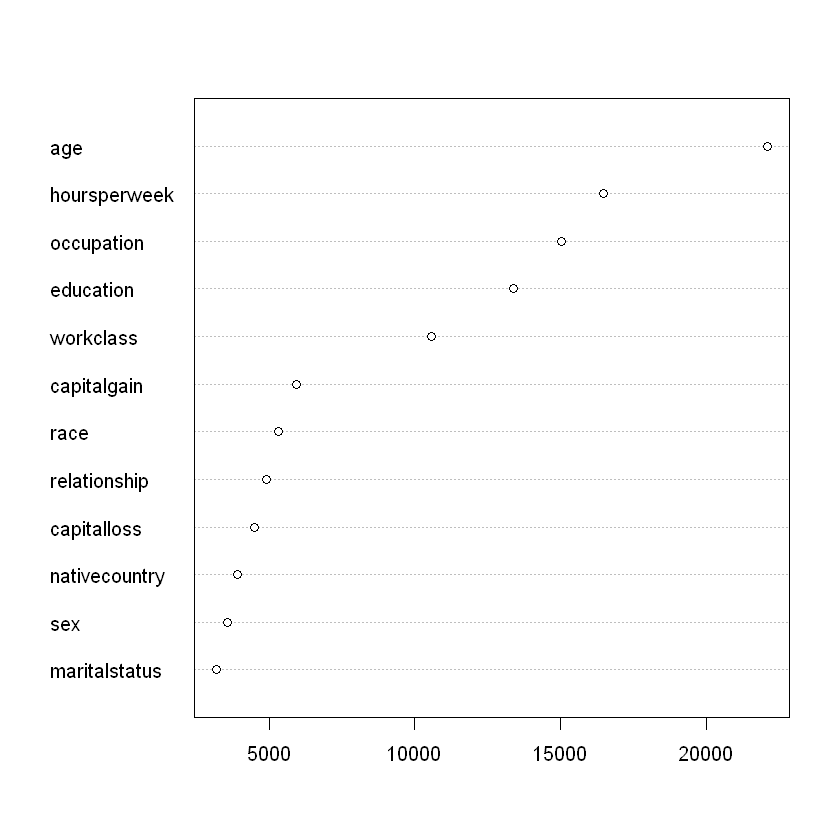

In [34]:
vu = varUsed(overForest, count=TRUE)
vusorted = sort(vu, decreasing=FALSE, index.return=TRUE)
dotchart(vusorted$x, names(overForest$forest$xlevels[vusorted$ix]))

A different metric we can look at is related to "impurity", which measures how homogenous each bucket or leaf of the tree is. In each tree in the forest, whenever we select a variable and perform a split, the impurity is decreased. Therefore, one way to measure the importance of a variable is to average the reduction in impurity, taken over all the times that variable is selected for splitting in all of the trees in the forest. To compute this metric, run the following command in R (replace "MODEL" with the name of your random forest model):
```R
varImpPlot(MODEL)
```

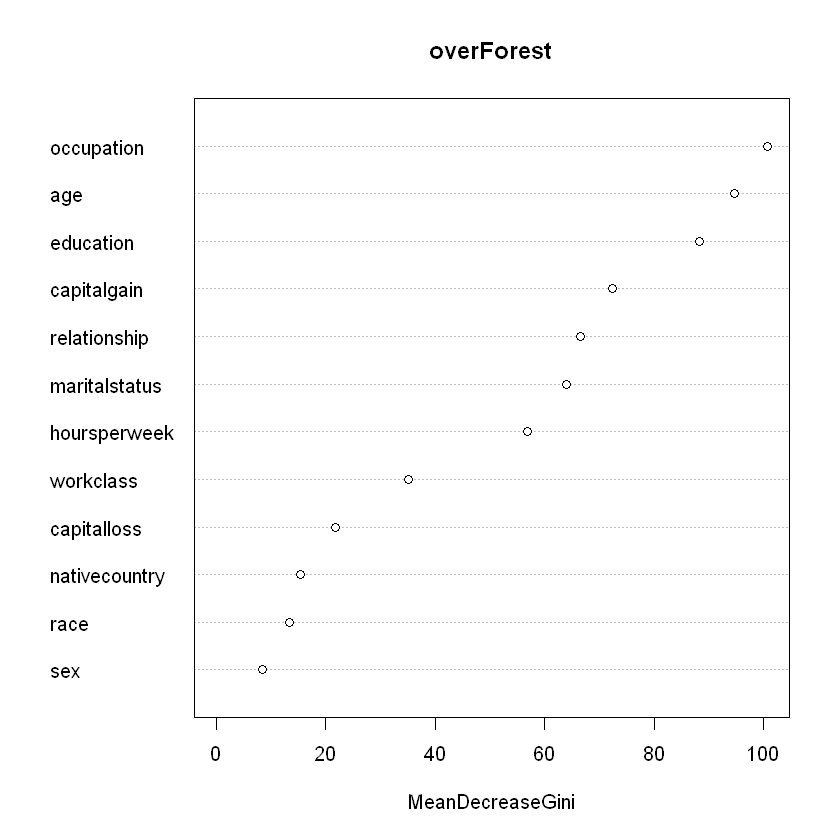

In [36]:
varImpPlot(overForest)

### Selecting cp by Cross-Validation

We now conclude our study of this data set by looking at how CART behaves with different choices of its parameters.

Let us select the cp parameter for our CART model using k-fold cross validation, with k = 10 folds. Do this by using the train function. Set the seed beforehand to 2. Test cp values from 0.002 to 0.1 in 0.002 increments, by using the following command:
```R
cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))
```
Also, remember to use the entire training set "train" when building this model. The train function might take some time to run.

In [37]:
library("caret")
library("e1071")

Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




In [38]:
set.seed(2)
numFolds = trainControl(method="cv", number=10)
cartGrid = expand.grid(.cp=seq(0.002, 0.1, 0.002))

In [39]:
train(over50k~.,data = train,method="rpart",trControl = numFolds,tuneGrid = cartGrid)

CART 

19187 samples
   12 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 17268, 17269, 17269, 17268, 17268, 17268, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.002  0.8506804  0.55166958
  0.004  0.8473968  0.55338034
  0.006  0.8458331  0.54517523
  0.008  0.8446864  0.54487864
  0.010  0.8448428  0.54615398
  0.012  0.8448428  0.54615398
  0.014  0.8448428  0.54615398
  0.016  0.8439048  0.54146539
  0.018  0.8415598  0.52766202
  0.020  0.8401527  0.51892369
  0.022  0.8390060  0.50919387
  0.024  0.8387453  0.50576836
  0.026  0.8387453  0.50576836
  0.028  0.8387453  0.50576836
  0.030  0.8376510  0.49966842
  0.032  0.8369215  0.49452710
  0.034  0.8349931  0.47865253
  0.036  0.8304592  0.45552417
  0.038  0.8255600  0.43503975
  0.040  0.8243611  0.43009541
  0.042  0.8243611  0.43009541
  0.044  0.8243611  0.43009541
  0.046  0.8243611  0.43009541
  0.048  

In [41]:
CARTover2 = rpart(over50k ~ ., data=train, method='class', cp=0.002)
pred2 = predict(CARTover2, newdata=test, type='class')

In [42]:
table(test$over50k, pred2)

        pred2
          <=50K  >50K
   <=50K   9178   535
   >50K    1240  1838

In [43]:
accuracy = (9178 + 1838) / nrow(test)
accuracy

[1] 0.8612306

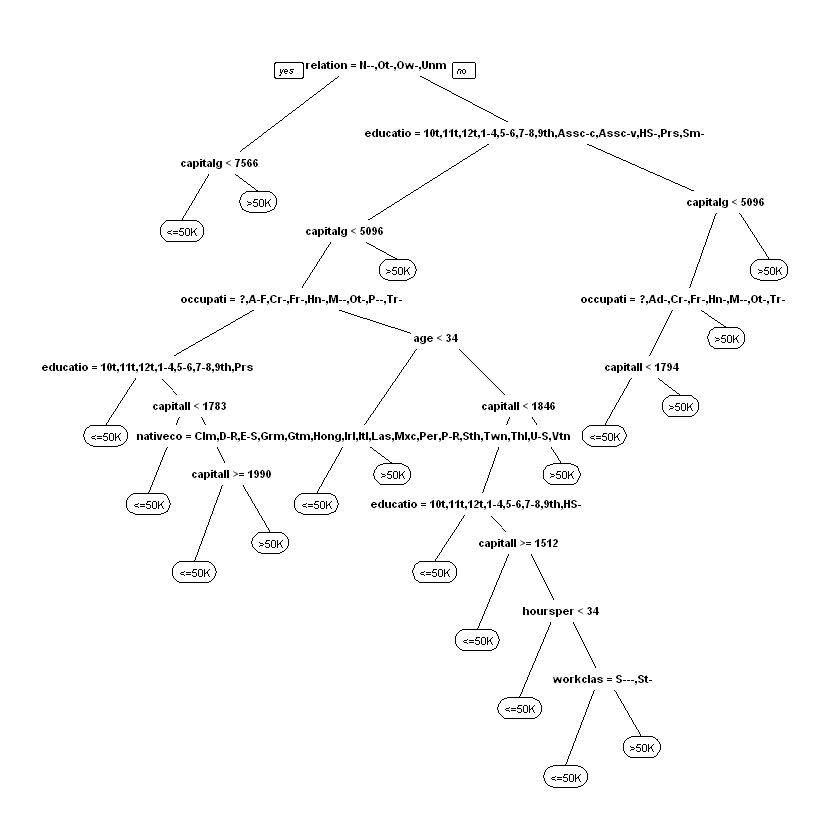

In [44]:
prp(CARTover2)

This highlights one important tradeoff in building predictive models. By tuning cp, we improved our accuracy by over 1%, but our tree became significantly more complicated. In some applications, such an improvement in accuracy would be worth the loss in interpretability. In others, we may prefer a less accurate model that is simpler to understand and describe over a more accurate -- but more complicated -- model.